# Assignment 3 Question 2

In [299]:
#Open packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [300]:
#Running a simulation model
def normal_income_sim(p):
    
    """
    Requires a simulation profile, p, structured as a dictionary
    
    p = {
        'mu'          : 0,          #mean of the standard normal distribution
        'sigma'       : 0.13,       #standard deviation
        'inc'         : 80000,      #starting income
        'gr'          : 0.025,      #growth rate
        'rho'         : 0.4,        #persistence
        'st_year'     : int(2018),  #start year
        'w_years'     : 40,         #no. of working years 
        'num_draws'   : 10000       #simulations
    }
    """    

    #set random seed
    np.random.seed(524)

    errors = np.random.normal(p['mu'], p['sigma'], (p['w_years'], p['num_draws']))

    #create a matrix (w_years, num_draws)
    income_sim_matrix = np.zeros((p['w_years'], p['num_draws']))

    #fill the matrix
    income_sim_matrix[0, :] = np.log(p['inc']) + errors[0, :]

    #loop and apply model
    for yr in range(1, p['w_years']):
        income_sim_matrix [yr, :] = (1 - p['rho'])*(np.log(p['inc']) + p['gr']*yr) + p['rho']*(income_sim_matrix[yr-1, :]) + errors[yr, :]                
    income_sim_mat = np.exp(income_sim_matrix) #dealing with large numbers so put in terms of 10k's
    return income_sim_mat                                                         

In [301]:
simulation_profile = {
        'mu'          : 0,          #mean of the standard normal distribution
        'sigma'       : 0.13,       #standard deviation
        'inc'         : 80000,      #starting income
        'gr'          : 0.025,      #growth rate
        'rho'         : 0.4,        #persistence
        'st_year'     : int(2020),  #start year
        'w_years'     : 40,         #no. of working years 
        'num_draws'   : 10000       #simulations
    }
    
income = normal_income_sim(simulation_profile)
print(income)

[[ 66409.15585396  98274.13534194 101939.81109509 ...  98720.39690442
   72404.51636886  68710.32820307]
 [ 80020.53020329  67383.19350738  84557.85626308 ...  68247.7770509
   74518.33613244  80555.96068584]
 [ 75805.26636606  66134.42494243  91458.20304692 ...  67268.53350159
   90012.42673528  80645.62355527]
 ...
 [272690.56519108 217821.73027242 184724.24512469 ... 159922.45424852
  253961.68337673 209741.55004062]
 [231539.17420799 202509.15149494 197955.96626493 ... 199502.43481758
  210951.71828579 205420.27946389]
 [197895.95201384 165115.10025278 172644.86927513 ... 248654.44847819
  234237.14656466 221566.29879732]]


#### 2(a) Plotting one person's income

Text(0,0.5,'Annual income (\\$s)')

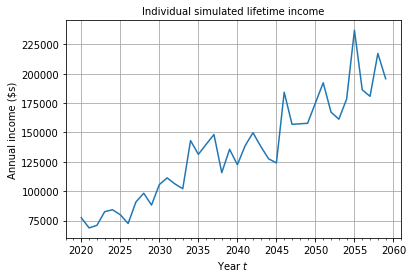

In [302]:
%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['w_years'])
individual = 125
fig, ax = plt.subplots()
plt.plot(year_vec, income[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')

#### 2(b) Plotting a histogram for year 2020

Text(0.5,1,'MACSS Class of 2020 Income in Bins')

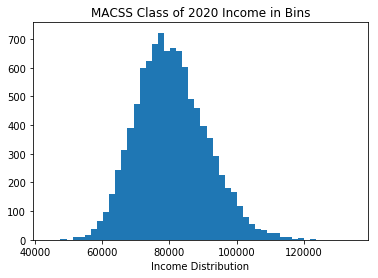

In [320]:
plt.hist(income[0,:], bins=50)
plt.xlabel("Income Distribution")
plt.title("MACSS Class of 2020 Income in Bins")

In [304]:
len(income[0, :] [income [0, :] > 100000]) / len(income[0, :])

0.0417

4.17% of the class will earn more than $100,000 in the first year of the program. 

In [305]:
len(income[0, :] [income [0, :] < 70000]) / len(income[0, :])

0.1512

15.12% of the class will earn less than $70,000 in the first year of the program. 

The distribution of the curve is slightly not normal and it is slightly rightly skewed.

#### 2(c) Plotting histogram of how many years it takes to pay $95,000

In [322]:
loan=0.1*income
t=[]
for i in range(10000):
        paid=loan[:,i][0]
        for j in range(1,40):
            if paid<95000: 
                paid=paid+loan[:,i][j]
            else: 
                t.append(j)
                break
                
print(t)

[11, 11, 10, 10, 11, 11, 11, 11, 12, 12, 12, 10, 12, 10, 11, 11, 10, 11, 11, 11, 10, 11, 11, 12, 11, 12, 12, 11, 11, 10, 11, 11, 11, 13, 11, 11, 11, 11, 11, 10, 11, 11, 11, 12, 11, 11, 11, 11, 11, 11, 10, 11, 11, 11, 11, 12, 11, 12, 11, 11, 12, 11, 10, 12, 11, 12, 11, 12, 11, 11, 11, 11, 12, 11, 11, 11, 11, 11, 12, 11, 11, 12, 11, 10, 11, 11, 11, 11, 11, 11, 12, 11, 10, 12, 11, 11, 12, 11, 12, 11, 11, 11, 11, 11, 11, 12, 11, 10, 12, 11, 10, 11, 12, 10, 12, 11, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 11, 11, 12, 12, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 11, 12, 12, 11, 11, 13, 12, 11, 11, 11, 11, 10, 12, 12, 11, 11, 11, 11, 11, 11, 12, 11, 11, 12, 10, 11, 11, 10, 12, 12, 12, 11, 12, 11, 11, 11, 11, 11, 11, 11, 12, 11, 13, 10, 12, 11, 11, 12, 11, 11, 12, 10, 11, 12, 11, 11, 12, 12, 11, 11, 11, 11, 12, 11, 10, 12, 11, 10, 11, 11, 10, 11, 11, 11, 10, 11, 11, 11, 12, 10, 11, 12, 10, 10, 11, 10, 11, 11, 11, 10, 11, 11, 12, 12, 11, 11, 11, 11, 10, 12, 11, 12, 10, 12, 11, 10, 10,

Text(0.5,1,'Distribution of Number of Years To Pay Off Loans in Bins')

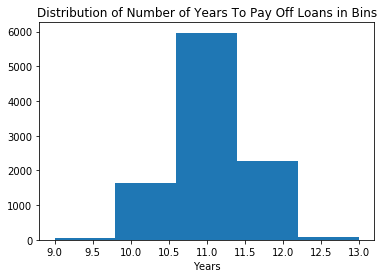

In [314]:
#As there are 5 unique years (9, 10, 11, 12, 13) in which people pay off their debt, there are 5 bins.
plt.hist(t, bins=5)
plt.xlabel("Years")
plt.title("Distribution of Number of Years To Pay Off Loans in Bins")

In [315]:
perc = 0 
for i in range(10000):
    if t[i] <= 10:
        perc += 1
perc/10000

0.1678

16.78% of the simulations are able to pay off the loan in 10 years.

#### 2 (d) Running the new model 

In [316]:
simulation_profile = {
        'mu1'          : 0,          #mean of the standard normal distribution
        'sigma1'       : 0.17,       #standard deviation
        'inc1'         : 90000,      #starting income
        'gr1'          : 0.025,      #growth rate
        'rho1'         : 0.4,        #persistence
        'st_year1'     : int(2018),  #start year
        'w_years1'     : 40,         #no. of working years 
        'num_draws1'   : 10000       #simulations
    }
    
new_income = new_normal_income_sim(simulation_profile)
print(new_income)

[[ 70550.46142451 117783.33011091 123561.20729139 ... 118483.24080508
   78992.81966812  73764.25171169]
 [ 89615.63768821  71575.56495871  96317.75493523 ...  72778.88084775
   81644.3347736   90400.57899801]
 [ 82955.30101689  69396.06916251 106035.55593099 ...  70956.3661129
  103848.93176006  89949.09077038]
 ...
 [338309.11761165 252187.52025149 203293.03644369 ... 168361.21927259
  308250.29858492 240024.49205936]
 [271061.07048342 227502.32436192 220836.5697397  ... 223095.32811759
  239983.96514044 231788.44418303]
 [219057.46748997 172865.33333479 183245.71710131 ... 295275.8618388
  273090.00167035 253934.86273481]]


In [325]:
loan=0.1*new_income
m=[]
for i in range(10000):
        paid=loan[:,i][0]
        for j in range(1,40):
            if paid<95000: 
                paid=paid+loan[:,i][j]
            else: 
                m.append(j)
                break
print(m)

[10, 10, 9, 9, 11, 10, 10, 10, 11, 10, 12, 9, 11, 9, 10, 10, 9, 9, 11, 9, 9, 10, 9, 11, 9, 11, 11, 9, 10, 9, 11, 9, 10, 12, 10, 10, 10, 10, 10, 9, 10, 10, 10, 11, 10, 10, 9, 10, 10, 10, 9, 9, 10, 10, 10, 10, 10, 11, 9, 10, 11, 10, 9, 11, 10, 11, 10, 11, 10, 11, 10, 10, 11, 10, 10, 10, 10, 10, 11, 9, 10, 10, 9, 9, 10, 10, 10, 10, 10, 10, 11, 10, 9, 10, 10, 10, 11, 10, 11, 10, 10, 10, 11, 10, 10, 11, 10, 8, 11, 10, 9, 10, 10, 9, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 9, 10, 11, 11, 8, 10, 9, 9, 10, 9, 10, 10, 9, 10, 10, 11, 10, 10, 11, 10, 10, 12, 11, 10, 10, 10, 10, 9, 10, 11, 10, 9, 10, 10, 10, 10, 11, 10, 9, 11, 8, 10, 9, 9, 10, 12, 11, 10, 11, 10, 10, 10, 10, 10, 10, 10, 11, 10, 12, 9, 11, 10, 10, 10, 10, 9, 11, 9, 9, 11, 10, 10, 11, 11, 9, 10, 10, 10, 11, 10, 9, 11, 10, 9, 10, 10, 9, 11, 10, 10, 9, 9, 11, 10, 11, 9, 11, 11, 9, 9, 10, 9, 10, 10, 9, 8, 10, 10, 11, 11, 10, 10, 11, 9, 9, 11, 10, 11, 9, 11, 10, 9, 9, 11, 12, 10, 10, 10, 11, 10, 9, 10, 9, 9, 10, 9, 10, 10, 11

Text(0.5,1,'Distribution of the New Number of Years To Pay Off Loans in Bins')

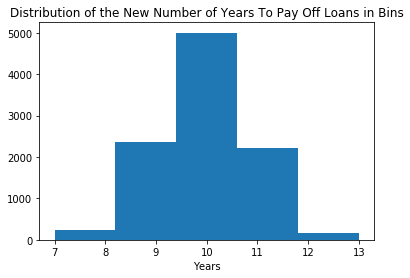

In [326]:
#As there are 5 unique years (8, 9, 10, 11, 12) in which people pay off their debt, there are 5 bins.
plt.hist(m, bins=5)
plt.xlabel("Years")
plt.title("Distribution of the New Number of Years To Pay Off Loans in Bins")

In [327]:
perc = 0 
for i in range(10000):
    if m[i] <= 10:
        perc += 1
perc/10000

0.7602

76.02% of the simulations are able to pay off the loan in 10 years.